In [2]:
import pandas as pd

In [4]:
data = pd.read_csv(
    'household_power_consumption.txt',
    sep=';',
    parse_dates=[['Date', 'Time']],
    infer_datetime_format=True,
    na_values=['?'],
    low_memory=False
)

<ipython-input-4-f2ff60610517>:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  data = pd.read_csv(
<ipython-input-4-f2ff60610517>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data = pd.read_csv(
<ipython-input-4-f2ff60610517>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data = pd.read_csv(


In [5]:
print("Dataset Info:")
print(data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32193 entries, 0 to 32192
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date_Time              32193 non-null  datetime64[ns]
 1   Global_active_power    32189 non-null  float64       
 2   Global_reactive_power  32189 non-null  float64       
 3   Voltage                32189 non-null  float64       
 4   Global_intensity       32189 non-null  float64       
 5   Sub_metering_1         32189 non-null  float64       
 6   Sub_metering_2         32188 non-null  float64       
 7   Sub_metering_3         32188 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.0 MB
None


In [6]:
print("\nFirst few rows of the dataset:")
print(data.head())


First few rows of the dataset:
            Date_Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


In [7]:
data.dropna(inplace=True)

In [8]:
cols_to_convert = [
    'Global_active_power', 'Global_reactive_power',
    'Voltage', 'Global_intensity',
    'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]
data[cols_to_convert] = data[cols_to_convert].astype(float)

print("\nData after cleaning:")
print(data.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 32188 entries, 0 to 32191
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date_Time              32188 non-null  datetime64[ns]
 1   Global_active_power    32188 non-null  float64       
 2   Global_reactive_power  32188 non-null  float64       
 3   Voltage                32188 non-null  float64       
 4   Global_intensity       32188 non-null  float64       
 5   Sub_metering_1         32188 non-null  float64       
 6   Sub_metering_2         32188 non-null  float64       
 7   Sub_metering_3         32188 non-null  float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 2.2 MB
None


In [9]:
#Add new time-based features
data['hour'] = data['Date_Time'].dt.hour
data['day_of_week'] = data['Date_Time'].dt.dayofweek
data['month'] = data['Date_Time'].dt.month

print("\nDataset with new features:")
print(data.head())


Dataset with new features:
            Date_Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  hour  \
0              18.4             0.0             1.0            17.0    17   
1              23.0             0.0             1.0            16.0    17   
2              23.0             0.0             2.0            17.0    17   
3              23.0             0.0             1.0            17.0    17   
4              15.8             0.0             1.0            17.0    17   

   day_of_week  month  
0            5  

In [10]:
import matplotlib.pyplot as plt

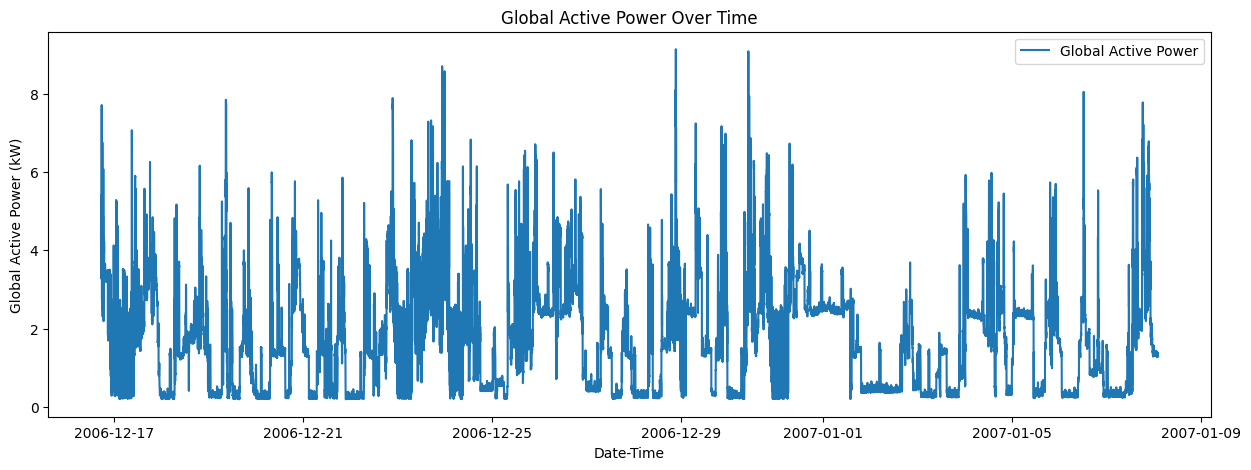

In [12]:
# Plot the Global Active Power over time
plt.figure(figsize=(15, 5))
plt.plot(data['Date_Time'], data['Global_active_power'], label='Global Active Power')
plt.xlabel('Date-Time')
plt.ylabel('Global Active Power (kW)')
plt.title('Global Active Power Over Time')
plt.legend()
plt.show()

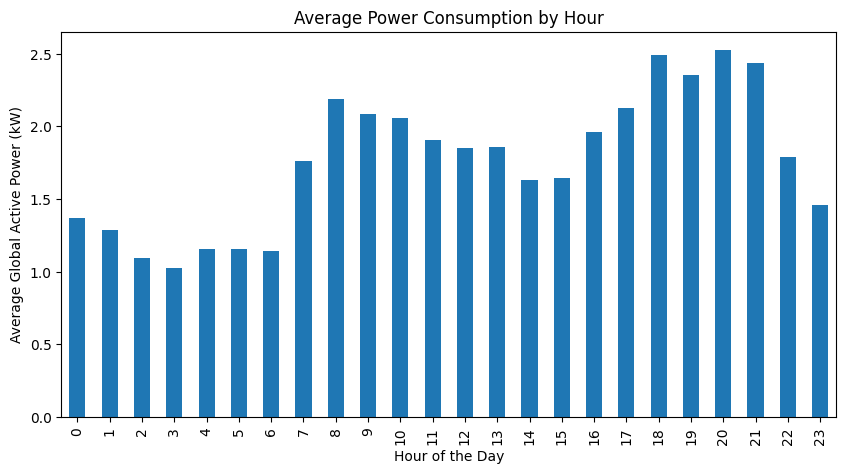

In [13]:
# Plot average power consumption by hour
data.groupby('hour')['Global_active_power'].mean().plot(kind='bar', figsize=(10, 5))
plt.xlabel('Hour of the Day')
plt.ylabel('Average Global Active Power (kW)')
plt.title('Average Power Consumption by Hour')
plt.show()

In [14]:
#Convert kWh to Wh
data['Global_active_power_Wh'] = data['Global_active_power'] * 1000  # Convert to watt-hours
print(data[['Date_Time', 'Global_active_power', 'Global_active_power_Wh']].head())


            Date_Time  Global_active_power  Global_active_power_Wh
0 2006-12-16 17:24:00                4.216                  4216.0
1 2006-12-16 17:25:00                5.360                  5360.0
2 2006-12-16 17:26:00                5.374                  5374.0
3 2006-12-16 17:27:00                5.388                  5388.0
4 2006-12-16 17:28:00                3.666                  3666.0


In [15]:
# Convert Wh to Joules
data['Global_active_power_J'] = data['Global_active_power_Wh'] * 3600
print(data[['Date_Time', 'Global_active_power_Wh', 'Global_active_power_J']].head())


            Date_Time  Global_active_power_Wh  Global_active_power_J
0 2006-12-16 17:24:00                  4216.0             15177600.0
1 2006-12-16 17:25:00                  5360.0             19296000.0
2 2006-12-16 17:26:00                  5374.0             19346400.0
3 2006-12-16 17:27:00                  5388.0             19396800.0
4 2006-12-16 17:28:00                  3666.0             13197600.0


In [ ]:
#Display the updated dataset with the new columns
print(data[['Date_Time', 'Global_active_power', 'Global_active_power_Wh', 'Voltage', 'Current']].head())

            Date_Time  Global_active_power  Global_active_power_Wh  Voltage  \
0 2006-12-16 17:24:00                4.216                  4216.0   234.84   
1 2006-12-16 17:25:00                5.360                  5360.0   233.63   
2 2006-12-16 17:26:00                5.374                  5374.0   233.29   
3 2006-12-16 17:27:00                5.388                  5388.0   233.74   
4 2006-12-16 17:28:00                3.666                  3666.0   235.68   

     Current  
0  17.952649  
1  22.942259  
2  23.035707  
3  23.051254  
4  15.554990  


In [16]:
#Monthly Energy Consumption
data['Monthly_energy_kWh'] = data['Global_active_power'] * 24 * 30
print(data[['Date_Time', 'Global_active_power', 'Monthly_energy_kWh']].head())


            Date_Time  Global_active_power  Monthly_energy_kWh
0 2006-12-16 17:24:00                4.216             3035.52
1 2006-12-16 17:25:00                5.360             3859.20
2 2006-12-16 17:26:00                5.374             3869.28
3 2006-12-16 17:27:00                5.388             3879.36
4 2006-12-16 17:28:00                3.666             2639.52


In [17]:
#Current Calculations
data['Current_A'] = data['Global_active_power_Wh'] / data['Voltage']
print(data[['Date_Time', 'Voltage', 'Global_active_power_Wh', 'Current_A']].head())


            Date_Time  Voltage  Global_active_power_Wh  Current_A
0 2006-12-16 17:24:00   234.84                  4216.0  17.952649
1 2006-12-16 17:25:00   233.63                  5360.0  22.942259
2 2006-12-16 17:26:00   233.29                  5374.0  23.035707
3 2006-12-16 17:27:00   233.74                  5388.0  23.051254
4 2006-12-16 17:28:00   235.68                  3666.0  15.554990


In [18]:
#Resistance Calculations
data['Resistance_ohms'] = data['Voltage'] / data['Current_A']
print(data[['Date_Time', 'Voltage', 'Current_A', 'Resistance_ohms']].head())


            Date_Time  Voltage  Current_A  Resistance_ohms
0 2006-12-16 17:24:00   234.84  17.952649        13.081078
1 2006-12-16 17:25:00   233.63  22.942259        10.183391
2 2006-12-16 17:26:00   233.29  23.035707        10.127321
3 2006-12-16 17:27:00   233.74  23.051254        10.140013
4 2006-12-16 17:28:00   235.68  15.554990        15.151408


In [20]:
#Power loss
data['Power_loss_W'] = data['Current_A']**2 * data['Resistance_ohms']
print(data[['Date_Time', 'Current_A', 'Resistance_ohms', 'Power_loss_W']].head())



            Date_Time  Current_A  Resistance_ohms  Power_loss_W
0 2006-12-16 17:24:00  17.952649        13.081078        4216.0
1 2006-12-16 17:25:00  22.942259        10.183391        5360.0
2 2006-12-16 17:26:00  23.035707        10.127321        5374.0
3 2006-12-16 17:27:00  23.051254        10.140013        5388.0
4 2006-12-16 17:28:00  15.554990        15.151408        3666.0


In [21]:
#summarising data
total_energy_kWh = data['Global_active_power'].sum()
average_voltage = data['Voltage'].mean()
peak_current = data['Current_A'].max()

print(f"Total Energy Consumption (kWh): {total_energy_kWh}")
print(f"Average Voltage (V): {average_voltage}")
print(f"Peak Current (A): {peak_current}")


Total Energy Consumption (kWh): 56931.724
Average Voltage (V): 241.27936280601466
Peak Current (A): 39.486314697107275


In [22]:
#Final dataset preview
#Print the first 5 rows of the updated dataset
print(data.head())


            Date_Time  Global_active_power  Global_reactive_power  Voltage  \
0 2006-12-16 17:24:00                4.216                  0.418   234.84   
1 2006-12-16 17:25:00                5.360                  0.436   233.63   
2 2006-12-16 17:26:00                5.374                  0.498   233.29   
3 2006-12-16 17:27:00                5.388                  0.502   233.74   
4 2006-12-16 17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  hour  \
0              18.4             0.0             1.0            17.0    17   
1              23.0             0.0             1.0            16.0    17   
2              23.0             0.0             2.0            17.0    17   
3              23.0             0.0             1.0            17.0    17   
4              15.8             0.0             1.0            17.0    17   

   day_of_week  month  Global_active_power_Wh  Global_active_power_J